In [ ]:
from google.colab import files

uploaded = files.upload()

Saving amazon_cells_labelled.txt to amazon_cells_labelled.txt


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['amazon_cells_labelled.txt']), sep = '\t')
print(df)

                                                  text  target
0    So there is no way for me to plug it in here i...       0
1                          Good case, Excellent value.       1
2                               Great for the jawbone.       1
3    Tied to charger for conversations lasting more...       0
4                                    The mic is great.       1
..                                                 ...     ...
995  The screen does get smudged easily because it ...       0
996  What a piece of junk.. I lose more calls on th...       0
997                       Item Does Not Match Picture.       0
998  The only thing that disappoint me is the infra...       0
999  You can not answer calls with the unit, never ...       0

[1000 rows x 2 columns]


In [ ]:
contagem_classes = df.groupby('target').count()
total = contagem_classes.sum()
porcentage_classes = contagem_classes / total * 100
print(porcentage_classes)

        text
target      
0       50.0
1       50.0


In [ ]:
!pip install scikit-learn==1.2.2
import numpy as np
from sklearn.model_selection import train_test_split
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 51.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train_indices = X_train.index
X_test_indices = X_test.index

X_train_text = df['text'].iloc[X_train_indices]
X_test_text = df['text'].iloc[X_test_indices]

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state = 10)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=10)

In [ ]:
y_pred = model.predict(X_test_tfidf)

In [ ]:
y_test

,target
521,1
737,1
740,1
660,0
411,1
...,...
109,0
430,1
77,1
84,0


In [ ]:
y_proba = model.predict_proba(X_test_tfidf)

In [ ]:
y_proba

array([[0.33, 0.67],
       [0.3 , 0.7 ],
       [0.22, 0.78],
       [0.85, 0.15],
       [0.37, 0.63],
       [0.35, 0.65],
       [0.67, 0.33],
       [0.19, 0.81],
       [0.78, 0.22],
       [0.16, 0.84],
       [0.13, 0.87],
       [0.86, 0.14],
       [0.49, 0.51],
       [0.47, 0.53],
       [0.44, 0.56],
       [0.76, 0.24],
       [0.08, 0.92],
       [0.97, 0.03],
       [0.45, 0.55],
       [0.11, 0.89],
       [0.35, 0.65],
       [0.31, 0.69],
       [0.27, 0.73],
       [0.55, 0.45],
       [0.85, 0.15],
       [0.77, 0.23],
       [0.85, 0.15],
       [0.58, 0.42],
       [0.47, 0.53],
       [0.1 , 0.9 ],
       [0.56, 0.44],
       [0.64, 0.36],
       [0.97, 0.03],
       [0.26, 0.74],
       [0.51, 0.49],
       [0.81, 0.19],
       [0.49, 0.51],
       [0.29, 0.71],
       [0.42, 0.58],
       [0.63, 0.37],
       [0.72, 0.28],
       [0.65, 0.35],
       [0.77, 0.23],
       [0.4 , 0.6 ],
       [0.8 , 0.2 ],
       [0.15, 0.85],
       [0.05, 0.95],
       [0.7 ,

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precisão: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")


Acurácia: 0.792
Precisão: 0.8031496062992126
Recall: 0.7906976744186046


In [ ]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00826446, 0.00826446,
       0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
       0.00826446, 0.00826446, 0.01652893, 0.03305785, 0.03305785,
       0.03305785, 0.03305785, 0.03305785, 0.05785124, 0.05785124,
       0.0661157 , 0.0661157 , 0.09090909, 0.11570248, 0.14876033,
       0.16528926, 0.16528926, 0.16528926, 0.16528926, 0.18181818,
       0.19834711, 0.20661157, 0.2231405 , 0.23140496, 0.23140496,
       0.26446281, 0.2892562 , 0.31404959, 0.33057851, 0.36363636,
       0.36363636, 0.37190083, 0.38842975, 0.42975207, 0.45454545,
       0.48760331, 0.49586777, 0.51239669, 0.52066116, 0.52892562,
       0.54545455, 0.5785124 , 0.59504132, 0.63636364, 0.6446281 ,
       0.66115702, 0.66942149, 0.67768595, 0.71900826, 0.73553719,
       0.76859504, 0.78512397, 0.79338843, 0.82644628, 0.85123

In [ ]:
tpr

array([0.        , 0.00775194, 0.02325581, 0.04651163, 0.05426357,
       0.06976744, 0.11627907, 0.12403101, 0.13953488, 0.1627907 ,
       0.19379845, 0.24031008, 0.26356589, 0.27906977, 0.29457364,
       0.34108527, 0.37984496, 0.42635659, 0.45736434, 0.48062016,
       0.49612403, 0.50387597, 0.51162791, 0.53488372, 0.5503876 ,
       0.58139535, 0.60465116, 0.62015504, 0.64341085, 0.65891473,
       0.65891473, 0.66666667, 0.66666667, 0.68217054, 0.68217054,
       0.70542636, 0.71317829, 0.73643411, 0.74418605, 0.76744186,
       0.78294574, 0.79069767, 0.80620155, 0.81395349, 0.82945736,
       0.8372093 , 0.86046512, 0.86821705, 0.88372093, 0.88372093,
       0.89922481, 0.90697674, 0.90697674, 0.90697674, 0.91472868,
       0.93023256, 0.93023256, 0.93023256, 0.93023256, 0.9379845 ,
       0.9379845 , 0.9379845 , 0.9379845 , 0.94573643, 0.96124031,
       0.96124031, 0.96899225, 0.99224806, 0.99224806, 0.99224806,
       0.99224806, 0.99224806, 0.99224806, 0.99224806, 1.     

In [ ]:
_

array([0.03, 0.05, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.13, 0.14, 0.15, 0.16,
       0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27,
       0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38,
       0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.47, 0.48, 0.49, 0.5 ,
       0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61,
       0.62, 0.63, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73,
       0.74, 0.75, 0.76, 0.78, 0.8 , 0.81, 0.82, 0.84, 0.85, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

AUC da Curva ROC (em porcentagem): 88.22%
AUC da Curva Precision-Recall (em porcentagem): 90.30%


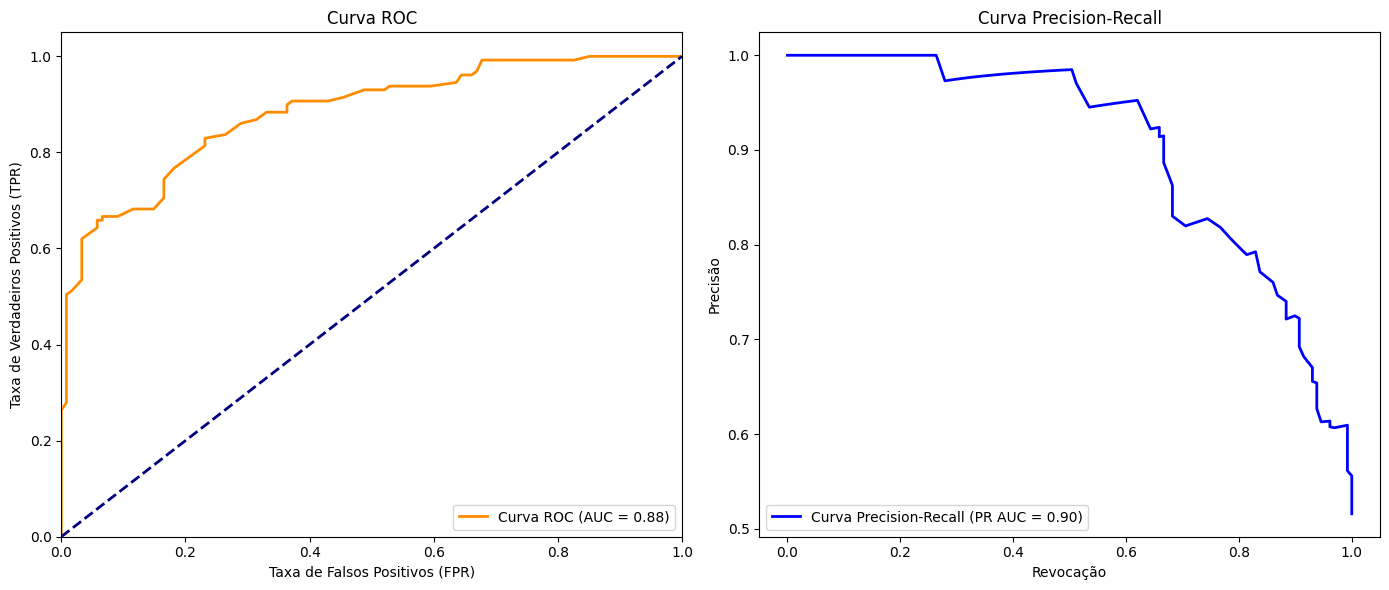

In [ ]:
y_prob = model.predict_proba(X_test_tfidf)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

roc_auc_percentage = roc_auc * 100
print(f"AUC da Curva ROC (em porcentagem): {roc_auc_percentage:.2f}%")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)

pr_auc = auc(recall_vals, precision_vals)

pr_auc_percentage = pr_auc * 100
print(f"AUC da Curva Precision-Recall (em porcentagem): {pr_auc_percentage:.2f}%")

plt.subplot(1, 2, 2)
plt.plot(recall_vals, precision_vals, color='blue', lw=2, label=f'Curva Precision-Recall (PR AUC = {pr_auc:.2f})')
plt.xlabel('Revocação')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

In [ ]:
df_combined = pd.DataFrame({
    'Probabilidade_Prevista': y_prob,
    'Valor_Real': y_test
})

print(df_combined)

     Probabilidade_Prevista  Valor_Real
521                    0.67           1
737                    0.70           1
740                    0.78           1
660                    0.15           0
411                    0.63           1
..                      ...         ...
109                    0.27           0
430                    0.31           1
77                     0.89           1
84                     0.59           0
286                    0.57           0

[250 rows x 2 columns]


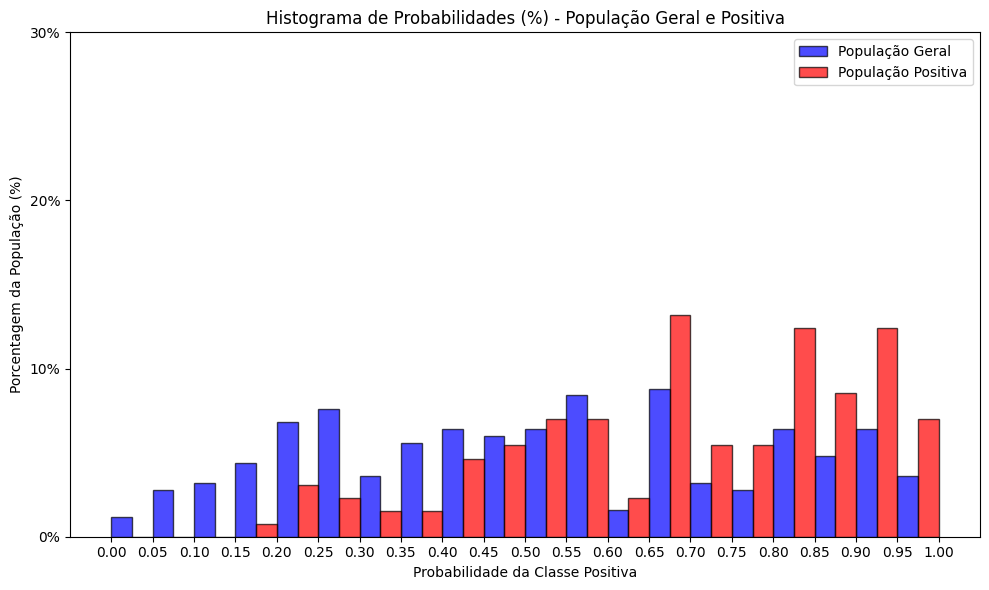

,Intervalo de Probabilidade,População Geral (%),População Positiva (%)
0,0.00 - 0.05,1.20%,0.00%
1,0.05 - 0.10,2.80%,0.00%
2,0.10 - 0.15,3.20%,0.00%
3,0.15 - 0.20,4.40%,0.78%
4,0.20 - 0.25,6.80%,3.10%
5,0.25 - 0.30,7.60%,2.33%
6,0.30 - 0.35,3.60%,1.55%
7,0.35 - 0.40,5.60%,1.55%
8,0.40 - 0.45,6.40%,4.65%
9,0.45 - 0.50,6.00%,5.43%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_population_with_visual_table(df_combined, step=0.1):
    bins = np.arange(0, 1 + step, step)
    total_population = len(df_combined)
    total_positive = np.sum(df_combined['Valor_Real'] == 1)
    counts_general, _ = np.histogram(df_combined['Probabilidade_Prevista'], bins=bins)
    percentage_general = counts_general / total_population
    counts_positive, _ = np.histogram(df_combined[df_combined['Valor_Real'] == 1]['Probabilidade_Prevista'], bins=bins)
    percentage_positive = counts_positive / total_positive

    data = {
        'Intervalo de Probabilidade': [f'{bins[i]:.2f} - {bins[i+1]:.2f}' for i in range(len(bins)-1)],
        'População Geral (%)': [f'{x*100:.2f}%' for x in percentage_general],
        'População Positiva (%)': [f'{x*100:.2f}%' for x in percentage_positive]
    }
    df_comparativo = pd.DataFrame(data)

    fig, ax = plt.subplots(figsize=(10, 6))
    width = step / 2
    ax.bar(bins[:-1], percentage_general, width=width, alpha=0.7, label='População Geral', color='blue', edgecolor='black', align='edge')
    ax.bar(bins[:-1] + width, percentage_positive, width=width, alpha=0.7, label='População Positiva', color='red', edgecolor='black', align='edge')
    ax.set_yticks(np.linspace(0, 0.3, 4))
    ax.set_yticklabels([f'{int(x*100)}%' for x in np.linspace(0, 0.3, 4)])
    ax.set_ylim(0, 0.3)
    ax.set_xticks(bins)
    ax.set_xticklabels([f'{x:.2f}' for x in bins])
    ax.set_xlabel('Probabilidade da Classe Positiva')
    ax.set_ylabel('Porcentagem da População (%)')
    ax.set_title('Histograma de Probabilidades (%) - População Geral e Positiva')
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

    styled_table = df_comparativo.style.set_properties(**{
        'border': '1px solid black',
        'text-align': 'center',
        'padding': '10px'
    }).set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f0f0f0'), ('border', '1px solid black'), ('padding', '10px')]
    }])

    display(styled_table)

plot_population_with_visual_table(df_combined, step=0.05)
